In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tifffile
from pathlib import Path
from segment_everything.util import labels_to_results

In [2]:
tnia_images_path = Path(r"D:\images")
parent_path=Path(tnia_images_path / r'tnia-python-images/imagesc/2024_04_09_SAM_training')

large_images = tifffile.imread(parent_path / 'training.tif')
large_masks = tifffile.imread(parent_path / 'training_groundtruth.tif')
large_images=large_images[:200,:,:]
large_masks=large_masks[:200,:,:]

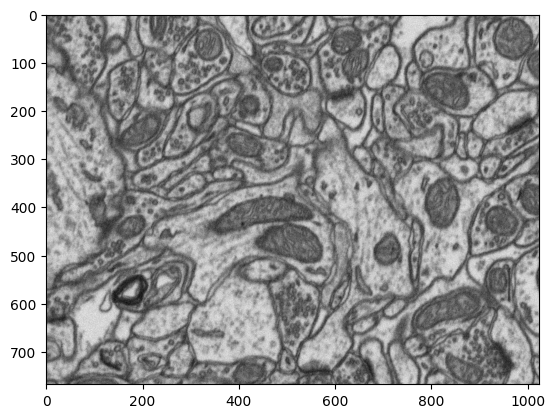

In [3]:
plt.imshow(large_images[0], cmap='gray')

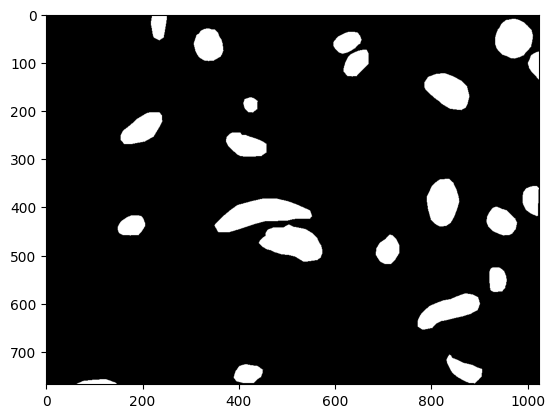

In [4]:
plt.imshow(large_masks[0], cmap='gray')

In [8]:
from math import pi
from segment_everything.util import labels_to_grid_of_results, labels_to_results
import pickle
from skimage.measure import label

labels = label(large_masks[0])

#results = labels_to_grid_of_results(labels, 4)
results = labels_to_results(labels, True, True)

print(len(results))

pickle_name = parent_path / 'training_groundtruth_5.pkl'
    
project = {'results': results, 'image': large_images[0], 'binary': large_masks[0]}


print(pickle_name)
with open(pickle_name, 'wb') as f:
    pickle.dump(project, f)

Converting labels to results...
44
D:\images\tnia-python-images\imagesc\2024_04_09_SAM_training\training_groundtruth_5.pkl


In [7]:
for result in results:
    print(result['segmentation'].max())

False
False
False
True
False
False
False
False
False
False
False
False
True
False
False
False


In [6]:
import os

train_path = parent_path / 'train'

if not os.path.exists(train_path):
    os.makedirs(train_path)


#for n in range(len(large_images)):
for n in range(50):
    print(n)
    test_image = large_images[n]
    test_masks = large_masks[n]
    
    results = labels_to_results(test_masks)
    print(len(results))
    #test1, test2 = generate_background_results(test_masks, 5, results)
    print(len(results))
    project = {'results': results, 'image': test_image, 'binary': test_masks}

    pickle_name = train_path / f'train{n}.pkl'

    import pickle
    with open(pickle_name, 'wb') as f:
        pickle.dump(project, f)

0
Converting labels to results...
22
22
1
Converting labels to results...
22
22
2
Converting labels to results...
20
20
3
Converting labels to results...
21
21
4
Converting labels to results...
21
21
5
Converting labels to results...
21
21
6
Converting labels to results...
21
21
7
Converting labels to results...
20
20
8
Converting labels to results...
20
20
9
Converting labels to results...
19
19
10
Converting labels to results...
19
19
11
Converting labels to results...
19
19
12
Converting labels to results...
20
20
13
Converting labels to results...
20
20
14
Converting labels to results...
20
20
15
Converting labels to results...
19
19
16
Converting labels to results...
18
18
17
Converting labels to results...
19
19
18
Converting labels to results...
19
19
19
Converting labels to results...
19
19
20
Converting labels to results...
19
19
21
Converting labels to results...
19
19
22
Converting labels to results...
20
20
23
Converting labels to results...
20
20
24
Converting labels to re

In [20]:
from segment_everything.util import generate_background_results



In [25]:
test1, test2 = generate_background_results(large_masks[0], 5)

In [ ]:
inverse = large_masks[0] == 0

plt.show(inverse

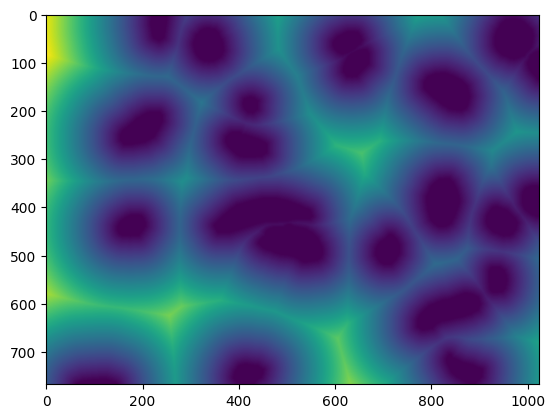

In [30]:
plt.imshow(test2)